In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pwd

'/sdf/home/c/carsmith/flash_reconstruction/flash_detection/notebooks'

In [3]:
cd ..

/sdf/home/c/carsmith/flash_reconstruction/flash_detection


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


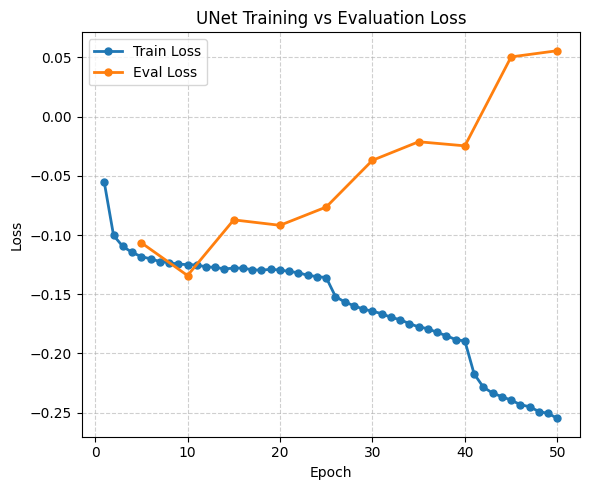

In [14]:
df = pd.read_csv('wandb_data/unet_200k_50epochs.csv')
t_loss = df['new_200k_logpois001 - train_loss'].to_numpy()
eval_loss = df['new_200k_logpois001 - eval_loss'].to_numpy()

t_loss = t_loss[~np.isnan(t_loss)]
eval_loss = eval_loss[~np.isnan(eval_loss)]

# --- Epoch indices ---
epochs_t = np.arange(1, len(t_loss) + 1)                        # every epoch
epochs_v = np.arange(len(eval_loss)) * 5 + 5                   # eval every 5 epochs

# --- Plot ---
plt.figure(figsize=(6, 5))
plt.plot(epochs_t, t_loss, label="Train Loss", marker='o', markersize=5, linewidth=2)
plt.plot(epochs_v, eval_loss, label="Eval Loss", marker='o', markersize=5, linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("UNet Training vs Evaluation Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [64]:
# df2 = pd.read_csv('wandb_data/valacc_trans_sampledbce_50epochs.csv')
# trans_va = df2['loss-development - eval_acc']
# trans_va = trans_va.to_numpy() # offset by 5 epochs

# df3 = pd.read_csv('wandb_data/trainacc_unet_sampledbce_10epochs.csv')
# unet_ta = df3['loss-development - train_acc']
# unet_ta = unet_ta.to_numpy()

# df4 = pd.read_csv('wandb_data/valacc_unet_sampledbce_10epochs.csv')
# unet_va = df4['loss-development - eval_acc']
# unet_va = unet_va.to_numpy() # offset by 5 epochs

Index(['Step', 'lambda_0.1_poisson_log - train_loss',
       'lambda_0.1_poisson_log - train_loss__MIN',
       'lambda_0.1_poisson_log - train_loss__MAX',
       'lambda_0.1_poisson_log - eval_loss',
       'lambda_0.1_poisson_log - eval_loss__MIN',
       'lambda_0.1_poisson_log - eval_loss__MAX'],
      dtype='object')


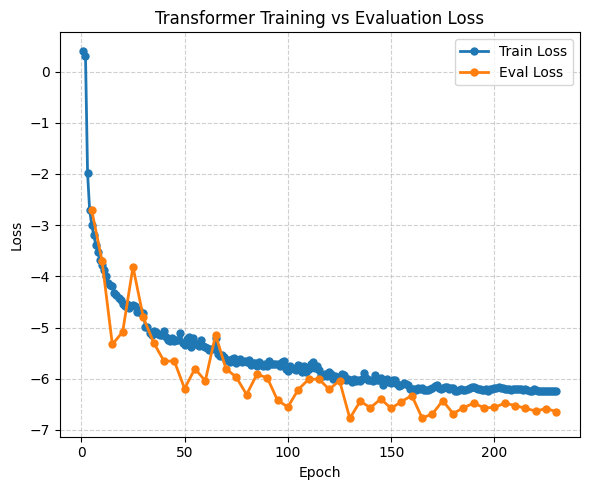

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load part 2 ---
df2 = pd.read_csv('wandb_data/poiss_log_tpart2.csv')
t_loss2 = df2['lambda_0.1_poisson_log_part2 - train_loss'].to_numpy()
eval_loss2 = df2['lambda_0.1_poisson_log_part2 - eval_loss'].to_numpy()

# --- Load part 1 ---
df1 = pd.read_csv('wandb_data/poiss_log_tpart1.csv')
t_loss1 = df1['lambda_0.1_poisson_log - train_loss'].to_numpy()
eval_loss1 = df1['lambda_0.1_poisson_log - eval_loss'].to_numpy()

# Remove messed up training
t_loss1 = t_loss1[:-11]

# --- Remove NaNs from all arrays ---
t_loss1 = t_loss1[~np.isnan(t_loss1)]
t_loss2 = t_loss2[~np.isnan(t_loss2)]
eval_loss1 = eval_loss1[~np.isnan(eval_loss1)]
eval_loss1 = eval_loss1[:-1]
eval_loss2 = eval_loss2[~np.isnan(eval_loss2)]

# --- Concatenate clean arrays ---
t_loss = np.concatenate([t_loss1, t_loss2])
eval_loss = np.concatenate([eval_loss1, eval_loss2])

# --- Epoch indices ---
epochs_t = np.arange(1, len(t_loss) + 1)                        # every epoch
epochs_v = np.arange(len(eval_loss)) * 5 + 5                   # eval every 5 epochs

# --- Plot ---
plt.figure(figsize=(6, 5))
plt.plot(epochs_t, t_loss, label="Train Loss", marker='o', markersize=5, linewidth=2)
plt.plot(epochs_v, eval_loss, label="Eval Loss", marker='o', markersize=5, linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Transformer Training vs Evaluation Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [5]:
print(eval_loss.shape)

(46,)


In [24]:
# df1 = pd.read_csv('../wandb_data/class_reg_100.csv')
# print(df1.columns)
# t_acc = df1['run1 - train_acc']
# t_acc = t_acc.to_numpy()

# df2 = pd.read_csv('../wandb_data/class_reg_100_val_acc.csv')
# v_acc = df2['run1 - eval_acc']
# v_acc = v_acc.to_numpy()

# df3 = pd.read_csv('../wandb_data/class_reg_100_t_loss.csv')
# t_loss = df3['run1 - train_loss']
# t_loss = t_loss.to_numpy()

# df4 = pd.read_csv('../wandb_data/class_reg_100_v_loss.csv')
# v_loss = df4['run1 - eval_loss']
# v_loss = v_loss.to_numpy() # offset by 5 epochs

Index(['epoch', 'run1 - _step', 'run1 - _step__MIN', 'run1 - _step__MAX',
       'run1 - train_acc', 'run1 - train_acc__MIN', 'run1 - train_acc__MAX',
       'run1 - eval_acc', 'run1 - eval_acc__MIN', 'run1 - eval_acc__MAX'],
      dtype='object')


In [21]:
df1 = pd.read_csv('../wandb_data/unet_delayed_pois1.csv')
t_acc1 = df1['lambda_0.1_poisson - train_loss']
v_acc1 = df1['lambda_0.1_poisson - eval_loss']

df2 = pd.read_csv('../wandb_data/unet_delayed_pois2.csv')
t_acc2 = df2['lambda_0.1_poisson - train_loss']
v_acc2 = df2['lambda_0.1_poisson - eval_loss']

t_acc = pd.concat([t_acc1, t_acc2], ignore_index=True)
v_acc = pd.concat([v_acc1, v_acc2], ignore_index=True)

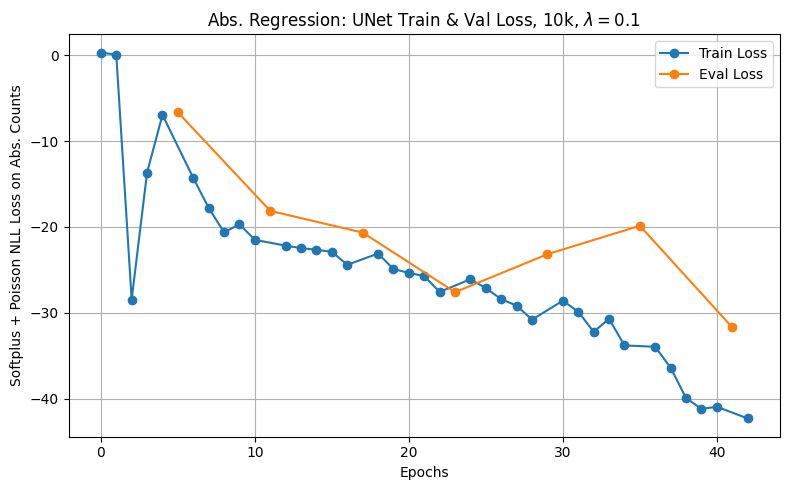

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Epoch indices
epochs_t = np.arange(len(t_acc))
epochs_v = np.arange(len(v_acc))

plt.figure(figsize=(8, 5))

# --- Train Loss (drop NaNs) ---
mask_t = t_acc.notna()
plt.plot(epochs_t[mask_t], t_acc[mask_t],
         linestyle='-', marker='o', label='Train Loss')

# --- Eval Loss (drop NaNs) ---
mask_v = v_acc.notna()
plt.plot(epochs_v[mask_v], v_acc[mask_v],
         linestyle='-', marker='o', label='Eval Loss')

plt.xlabel("Epochs")
plt.ylabel("Softplus + Poisson NLL Loss on Abs. Counts")
plt.title(r"Abs. Regression: UNet Train & Val Loss, 10k, $\lambda=0.1$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 't_loss' is not defined

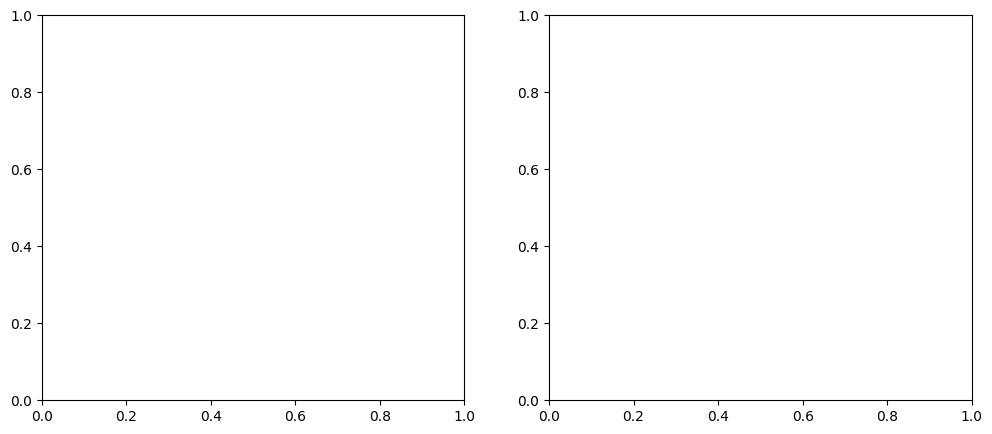

In [10]:
# Epoch indices
training_epochs = np.arange(len(t_acc))
val_epochs = np.arange(len(v_acc)) * 5

# training_loss = np.arange(len(t_loss)) * 5  # validated every 5 epochs
# val_loss = np.arange(len(v_loss)) * 5

# Create plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# --- Training Accuracy ---
axs[0].plot(training_epochs, t_loss, label='Training Loss', color='darkmagenta', marker='o')
axs[0].plot(val_epochs + 5, v_loss, label='Val Loss', color='mediumseagreen', marker='o')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Sampled + Weighted BCE Loss')
axs[0].set_yscale('symlog', linthresh=1e-2)
axs[0].legend()
axs[0].grid(True)

# --- Validation Accuracy ---
axs[1].plot(training_epochs, t_acc, label='Training Acc', marker='o', color='darkmagenta')
axs[1].plot(val_epochs + 5, v_acc, label='Val Acc', marker='o', color='mediumseagreen')
axs[1].set_title('Classification Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Classification Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Plotting Scratch

In [19]:
cd notebooks

/sdf/home/c/carsmith/flash_reconstruction/flash_detection/notebooks


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [22]:
results = np.load("test_ratiostats.npy", allow_pickle=True).item()
ratios = ["(0.1,0.2)", "(0.2,0.5)", "(0.5,1.0)", "(1.0,2.0)",
          "(2.0,5.0)", "(5.0,7.0)", "(7.0,10.0)"]
ticks = np.arange(len(ratios))

metrics = {
    "Flash Accuracies": ["merge_acc_flash1", "merge_acc_flash2"],
    # "Purity": ["merge_pure"],
    "Reco Fraction": ["reco_frac_flash1", "reco_frac_flash2"],
}
print(results['tr_160'].keys())

dict_keys(['reco_frac_flash1', 'reco_frac_flash2', 'merge_acc_flash1', 'merge_acc_flash2', 'merge_pure'])


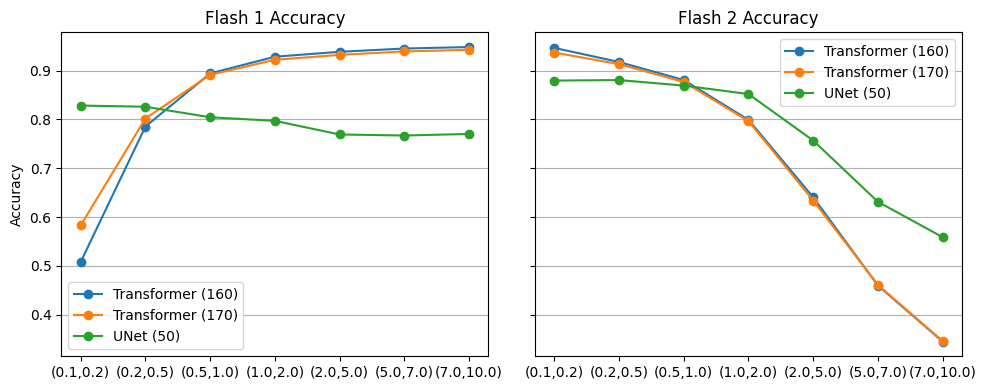

In [42]:
flash1_t_160 = results['tr_160']['merge_acc_flash1']
flash1_t_170 = results['tr_170']['merge_acc_flash1']
flash1_unet = results['unet']['merge_acc_flash1']

flash2_t_160 = results['tr_160']['merge_acc_flash2']
flash2_t_170 = results['tr_170']['merge_acc_flash2']
flash2_unet = results['unet']['merge_acc_flash2']

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Flash 1
axes[0].plot(ticks, flash1_t_160, marker='o', label='Transformer (160)')
axes[0].plot(ticks, flash1_t_170, marker='o', label='Transformer (170)')
axes[0].plot(ticks, flash1_unet, marker='o', label='UNet (50)')
axes[0].set_title("Flash 1 Accuracy")
axes[0].set_ylabel("Accuracy")
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(ratios, rotation=0)
axes[0].grid(axis='y')
axes[0].legend()

# Flash 2
axes[1].plot(ticks, flash2_t_160, marker='o', label='Transformer (160)')
axes[1].plot(ticks, flash2_t_170, marker='o', label='Transformer (170)')
axes[1].plot(ticks, flash2_unet, marker='o', label='UNet (50)')
axes[1].set_title("Flash 2 Accuracy")
axes[1].set_xticks(ticks)
axes[1].set_xticklabels(ratios, rotation=0)
axes[1].grid(axis='y')
axes[1].legend()

plt.tight_layout()
plt.show()